# Loadind the Dataset

In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('feature_engineered_gaming_data.csv')

# Select relevant columns for imputation
columns_to_impute = ['Time (s)', 'Sound pressure level (dB)', 'Heart rate(bpm)', 'Time_rolling_avg_0.1s', 
                     'Time_rolling_avg_0.5s', 'Time_rolling_avg_1s', 'SPL_mean_0.5s', 'SPL_std_0.5s', 
                     'HR_mean_0.5s', 'HR_std_0.5s', 'SPL_HR_interaction', 'SPL_variance', 'HR_variance', 
                     'SPL_lag_1', 'HR_lag_1']

In [2]:
# Standardize the dataset
scaler = StandardScaler()
df[columns_to_impute] = scaler.fit_transform(df[columns_to_impute])

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Inverse transform to original scale
df[columns_to_impute] = scaler.inverse_transform(df[columns_to_impute])

# Random Forest Classifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the target and features
X = df[['Time (s)', 'Sound pressure level (dB)', 'Heart rate(bpm)', 'SPL_mean_0.5s', 
        'HR_mean_0.5s', 'SPL_HR_interaction', 'SPL_variance', 'HR_variance']]
y = df['emotional_state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9474950319004288
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4868
           1       0.94      0.93      0.93      2460
           2       0.94      0.95      0.94      2233

    accuracy                           0.95      9561
   macro avg       0.94      0.94      0.94      9561
weighted avg       0.95      0.95      0.95      9561



Cross-validation scores: [0.30206045 0.26242025 0.41537657 0.36537657 0.29822176]
Mean cross-validation accuracy: 0.32869111965056785


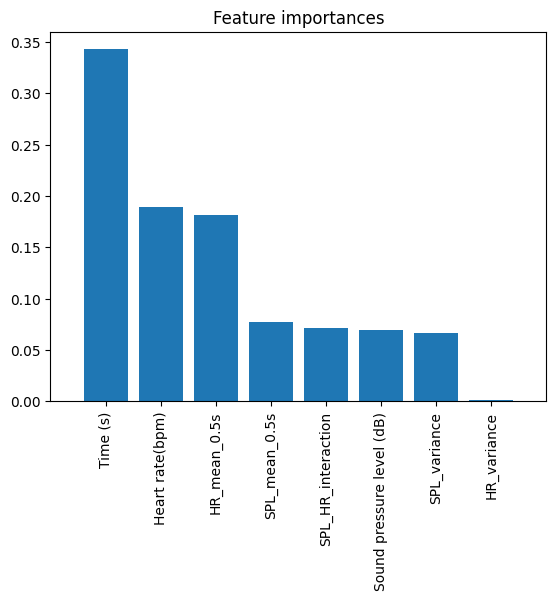

In [4]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {np.mean(cv_scores)}')

# Feature importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

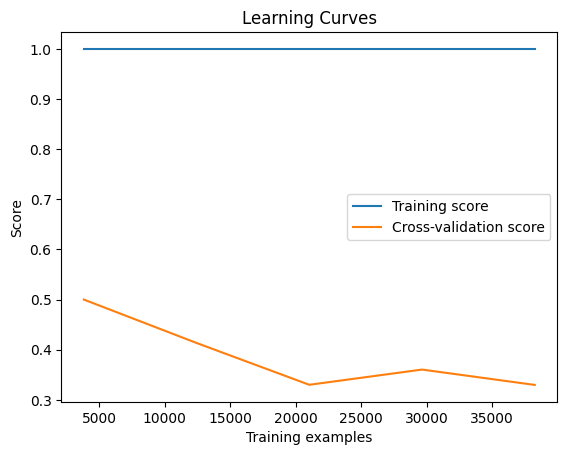

In [5]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming X and y are your features and target variable
# X, y = ...

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))